Importing the required dependencies

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading data from csv file

In [278]:
# display all columns
pd.set_option("display.max_columns", None)

df = pd.read_csv("Amazon Sale Report.csv")
print(df.shape)
df.head()

(128976, 21)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

### 1. Data Preprocessing

#### 1.1. Data cleaning:
--> Data type convertion
--> Removing unwanted columns.
--> Handling Missing Data.
--> Removing duplicate data.
--> Converting data to lower case.

In [280]:
# Chainging datatype of "Date" column from object to date.
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\phani\AppData\Local\Temp\ipykernel_1772\252919772.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [281]:
# Remove the empty columns --> "New, Pendings"

df.drop(columns=["New", "PendingS"], axis=1, inplace=True)
print("Shape of dataset after droping the columns: ", df.shape)

Shape of dataset after droping the columns:  (128976, 19)


Handling Missing data

In [282]:
# Handling Missing data

df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [283]:
# Checking percentage of missing data in each column

(df.isnull().sum() / df.shape[0]) * 100

index                  0.000000
Order ID               0.000000
Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Category               0.000000
Size                   0.000000
Courier Status         0.000000
Qty                    0.000000
currency               6.047637
Amount                 6.047637
ship-city              0.027137
ship-state             0.027137
ship-postal-code       0.027137
ship-country           0.027137
B2B                    0.000000
fulfilled-by          69.557902
dtype: float64

In [284]:
# Since 70% of the data is missing from "fulfilled-by" column --> 1. Impute 2. Drop the column

print("Displaying the unique values from 'fulfilled-by' column: ", df['fulfilled-by'].unique())
print("Displaying the number of unique values present in 'fulfilled-by' column: ", df['fulfilled-by'].nunique())

Displaying the unique values from 'fulfilled-by' column:  ['Easy Ship' nan]
Displaying the number of unique values present in 'fulfilled-by' column:  1


Drop the column --> Only one unique value in "fulfilled-by" column, Its does add any relevent information for data analysis.

In [285]:
print("Shape of the dataset before dropping the column: ", df.shape)

df.drop(['fulfilled-by'], axis=1, inplace=True)
print("Shape of the dataset after dropping the column: ", df.shape)

Shape of the dataset before dropping the column:  (128976, 19)
Shape of the dataset after dropping the column:  (128976, 18)


In [286]:
# Removing the missinfg data from the dataset (missing percentage is near to 5%, it does cause any impact on dataset distribution)

df.dropna(inplace=True)
print("Shape of dataset after removing the missing data: ", df.shape)

Shape of dataset after removing the missing data:  (121143, 18)


Handling Duplicate data

In [287]:
df.drop_duplicates(inplace=True)
print("Shape of dataset after removing the duplicated data: ", df.shape)

Shape of dataset after removing the duplicated data:  (120988, 18)


In [288]:
# Checking unique values from each column in the dataset.

col = df.columns

for i in col:
    print(i, "-->", df[i].nunique())

index --> 120988
Order ID --> 112861
Date --> 91
Status --> 12
Fulfilment --> 2
Sales Channel --> 1
ship-service-level --> 2
Category --> 9
Size --> 11
Courier Status --> 3
Qty --> 7
currency --> 1
Amount --> 1408
ship-city --> 8697
ship-state --> 68
ship-postal-code --> 9268
ship-country --> 1
B2B --> 2


Converting data to lower case

In [289]:
def lower_df(df):
    column = df.columns
    for col in column:
        if df[col].dtype == "object":
            df[col] = df[col].str.lower()

lower_df(df)

# Checking unique values from each column in the dataset after converting to lower case.

print("Unique values after converting to lower case: ")

col = df.columns

for i in col:
    print(i, "-->", df[i].nunique())

Unique values after converting to lower case: 
index --> 120988
Order ID --> 112861
Date --> 91
Status --> 12
Fulfilment --> 2
Sales Channel --> 1
ship-service-level --> 2
Category --> 9
Size --> 11
Courier Status --> 3
Qty --> 7
currency --> 1
Amount --> 1408
ship-city --> 7092
ship-state --> 46
ship-postal-code --> 9268
ship-country --> 1
B2B --> 2


#### 1.2. Feature Selection & Feature Extraction

In [290]:
print(df.shape)
df.head()

(120988, 18)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,cancelled,merchant,amazon.in,standard,t-shirt,s,on the way,0,inr,647.62,mumbai,maharashtra,400081.0,in,False
1,1,171-9198151-1101146,2022-04-30,shipped - delivered to buyer,merchant,amazon.in,standard,shirt,3xl,shipped,1,inr,406.00,bengaluru,karnataka,560085.0,in,False
2,2,404-0687676-7273146,2022-04-30,shipped,amazon,amazon.in,expedited,shirt,xl,shipped,1,inr,329.00,navi mumbai,maharashtra,410210.0,in,True
3,3,403-9615377-8133951,2022-04-30,cancelled,merchant,amazon.in,standard,blazzer,l,on the way,0,inr,753.33,puducherry,puducherry,605008.0,in,False
4,4,407-1069790-7240320,2022-04-30,shipped,amazon,amazon.in,expedited,trousers,3xl,shipped,1,inr,574.00,chennai,tamil nadu,600073.0,in,False


In [291]:
print(df.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')


Feature selection --> Selecting the relevent columns for the analysis

In [292]:
df1 = df.drop(columns=['index', 'Order ID', 'Sales Channel', 'currency', 'ship-postal-code'])
print("Print shape of new dataframe after feature selection: ", df1.shape)

Print shape of new dataframe after feature selection:  (120988, 13)


Feature Extraction --> Drawing new features from the existing features

In [293]:
# Extracting year and month from the "Date" column

df1["Year"] = df1["Date"].dt.year
df1["Month"] = df1["Date"].dt.month_name()

print(df1.columns)


Index(['Date', 'Status', 'Fulfilment', 'ship-service-level', 'Category',
       'Size', 'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-country', 'B2B', 'Year', 'Month'],
      dtype='object')


In [294]:
# Re-arranging the columns in the DataFrame

df1 = df1[['Date', 'Year', 'Month', 'Status', 'Fulfilment', 'ship-service-level', 'Category',
       'Size', 'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-country', 'B2B']]
print(df1.shape)

df1.head()

(120988, 15)


,Date,Year,Month,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-country,B2B
0,2022-04-30,2022,April,cancelled,merchant,standard,t-shirt,s,on the way,0,647.62,mumbai,maharashtra,in,False
1,2022-04-30,2022,April,shipped - delivered to buyer,merchant,standard,shirt,3xl,shipped,1,406.00,bengaluru,karnataka,in,False
2,2022-04-30,2022,April,shipped,amazon,expedited,shirt,xl,shipped,1,329.00,navi mumbai,maharashtra,in,True
3,2022-04-30,2022,April,cancelled,merchant,standard,blazzer,l,on the way,0,753.33,puducherry,puducherry,in,False
4,2022-04-30,2022,April,shipped,amazon,expedited,trousers,3xl,shipped,1,574.00,chennai,tamil nadu,in,False


In [295]:
df1.describe()

,Date,Year,Qty,Amount
count,120988,120988.0,120988.000000,120988.000000
mean,2022-05-12 12:39:18.739709696,2022.0,0.961261,648.643794
min,2022-03-31 00:00:00,2022.0,0.000000,0.000000
25%,2022-04-20 00:00:00,2022.0,1.000000,449.000000
50%,2022-05-10 00:00:00,2022.0,1.000000,605.000000
75%,2022-06-04 00:00:00,2022.0,1.000000,788.000000
max,2022-06-29 00:00:00,2022.0,8.000000,5584.000000
std,NaN,0.0,0.214284,281.235025


*1. Average amount spent by a customer per transaction is Rs. 648.*

*2. Average quantity ordered by a customer per transaction is "1" piece.*

In [296]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120988 entries, 0 to 128975
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                120988 non-null  datetime64[ns]
 1   Year                120988 non-null  int32         
 2   Month               120988 non-null  object        
 3   Status              120988 non-null  object        
 4   Fulfilment          120988 non-null  object        
 5   ship-service-level  120988 non-null  object        
 6   Category            120988 non-null  object        
 7   Size                120988 non-null  object        
 8   Courier Status      120988 non-null  object        
 9   Qty                 120988 non-null  int64         
 10  Amount              120988 non-null  float64       
 11  ship-city           120988 non-null  object        
 12  ship-state          120988 non-null  object        
 13  ship-country        120988 non-nul

In [297]:
# printng unique values in each column from the updated dataframe.

col1 = df1.columns

for i in col1:
    print(i, "-->", df1[i].nunique())

Date --> 91
Year --> 1
Month --> 4
Status --> 12
Fulfilment --> 2
ship-service-level --> 2
Category --> 9
Size --> 11
Courier Status --> 3
Qty --> 7
Amount --> 1408
ship-city --> 7092
ship-state --> 46
ship-country --> 1
B2B --> 2


### 1. Univariate Analysis  --> Analysis on a single column

1.1. Analysis on 'Date' column --> Numerical column

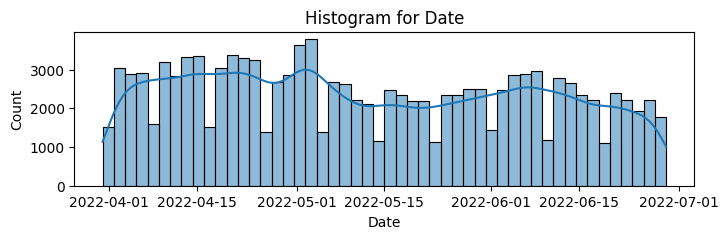

In [298]:
plt.figure(figsize=(8,2))
sns.histplot(df1['Date'], kde=True)
plt.title(f'Histogram for Date')
plt.show()

1.2. Analysis on 'Year' column

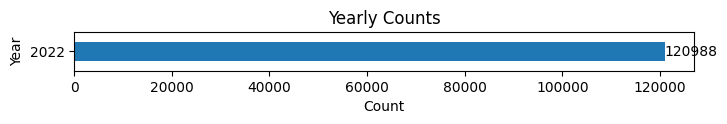

In [299]:
years = df1['Year'].value_counts()
# Create the bar plot
plt.figure(figsize=(8, 0.5))
bars = years.plot(kind='barh')

# Add labels to the bars
for bar in bars.containers:
    bars.bar_label(bar, label_type='edge')

plt.xlabel('Count')
plt.title('Yearly Counts')
plt.show()

1.3. Analysis on 'Month' column --> Categorical

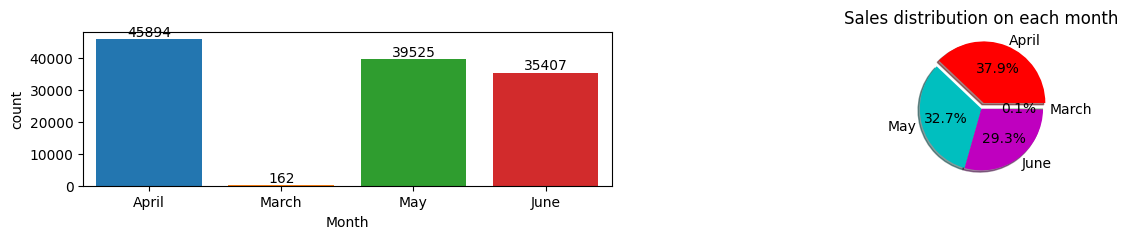

In [300]:
f,ax=plt.subplots(1,2,figsize=(15,2))
sns.countplot(x=df1['Month'],data=df1,hue = df1['Month'],ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df1['Month'].value_counts(),labels=['April','May','June','March'],autopct='%1.1f%%',shadow=True, explode=[0.1,0,0,0], colors=['r','c','m','g'])
plt.title("Sales distribution on each month")
plt.show()

Insights:

1. 99% percent of the sales are happening in the months of April, May & June. 

2. Summer sales are high in year 2022.


1.4. Analysis on the Delivery status, i.e, on the "Status" column

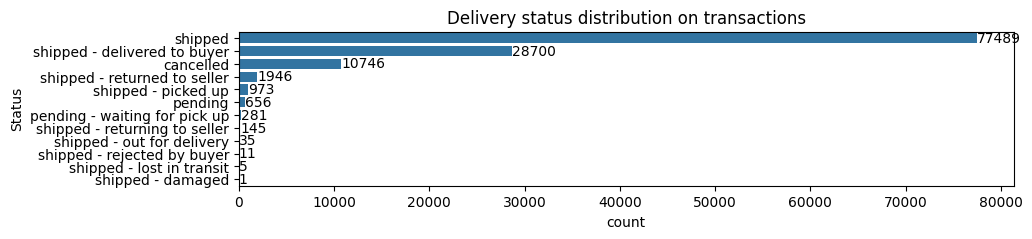

In [301]:
plt.figure(figsize=(10,2))
bars = sns.countplot(y='Status', data=df1, order=df1['Status'].value_counts().index)
for bar in bars.containers:   
    bars.bar_label(bar, label_type='edge')

plt.title("Delivery status distribution on transactions")
plt.show()

1.5. Analysis on Fulfilment column 

In [302]:
df1.Fulfilment.value_counts()

Fulfilment
amazon      83524
merchant    37464
Name: count, dtype: int64

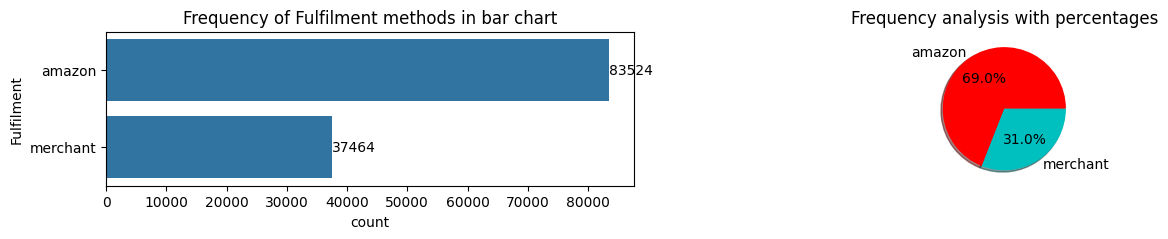

In [303]:
f, ax = plt.subplots(1,2, figsize=(15,2))
bars = sns.countplot(y='Fulfilment', data=df1, order=df1['Fulfilment'].value_counts().index, ax=ax[0])
for bar in bars.containers:
    bars.bar_label(bar, label_type='edge')

plt.pie(x=df1['Fulfilment'].value_counts(),labels=df1['Fulfilment'].value_counts().index,autopct='%1.1f%%',shadow=True,colors=['r','c'])
ax[0].set_title("Frequency of Fulfilment methods in bar chart")
ax[1].set_title("Frequency analysis with percentages")
plt.show()

Insights:

1. 70% of the stock is handled by amazon. Amazon handles the storage, packing, shipping, customer service, and returns.
2. 30% of the stock is handled by the merchant (who is some third party logistic provider)

1.6. Ship-Service-Level column:

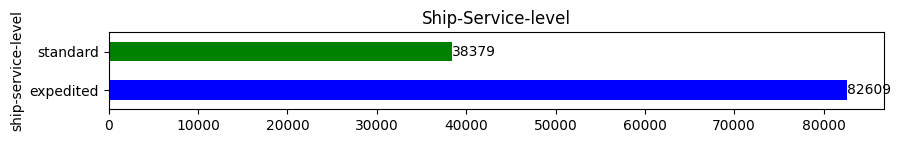

In [304]:
plt.figure(figsize=(10,1))
bars = df1['ship-service-level'].value_counts().plot(kind='barh', color={'blue','green'})
for bar in bars.containers:
    bars.bar_label(bar)

plt.title("Ship-Service-level")
plt.show()

Insights from above graph:

1. Standard: Generally costs lower than expedited shipping. 33% percent of the shiping

2. Expidicted: Delivery time is less, 67% of customers choosing it for faster delivery.

1.7. Analysis on "Category" column --> Type of clothings

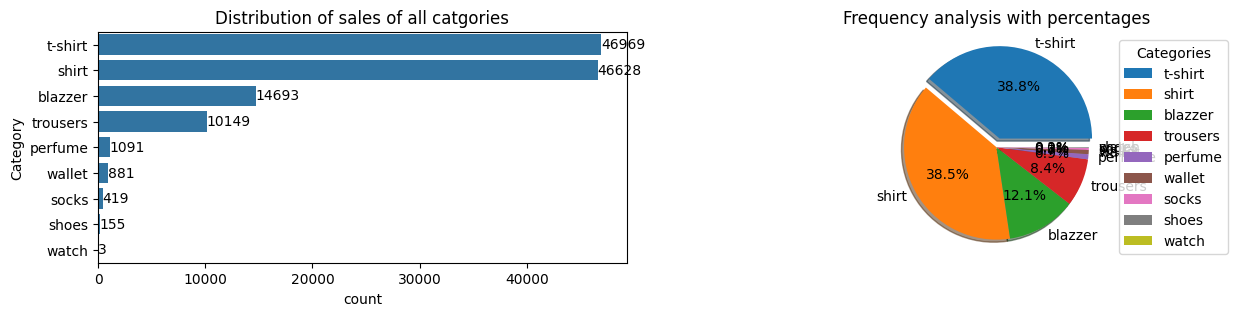

In [305]:
f, ax = plt.subplots(1,2, figsize=(15,3))
bars = sns.countplot(y='Category', data=df1, order=df1['Category'].value_counts().index, ax=ax[0])
for bar in bars.containers:
    bars.bar_label(bar, label_type='edge')

plt.pie(x=df1['Category'].value_counts(),labels=df1['Category'].value_counts().index,autopct='%1.1f%%', explode=[0.1,0,0,0,0,0,0,0,0],shadow=True)
# plt.legend(title="Category")
plt.legend(title="Categories", loc="center left", bbox_to_anchor=(1, 0.5))
ax[0].set_title("Distribution of sales of all catgories")
ax[1].set_title("Frequency analysis with percentages")
plt.show()

Insights from category:

1. Out of 100% sales, 98% of its sales are from the clothings.

2. 78% of its sales are from T-shirt & Shirts.

1.8. Analyzing the "Size" column.

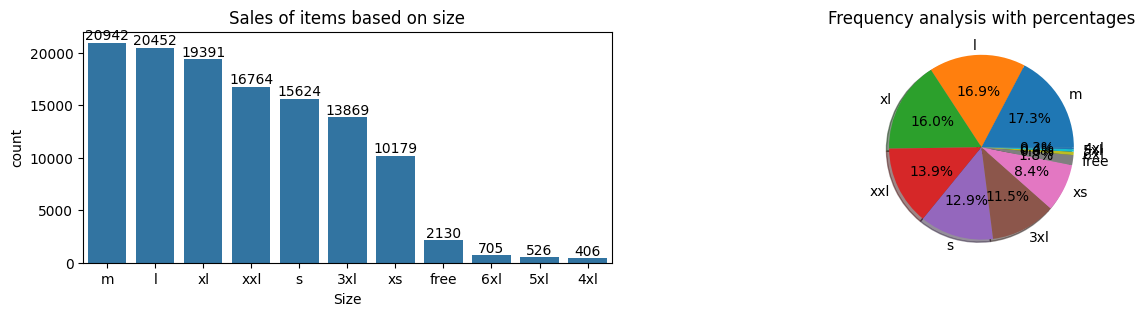

In [306]:
f, ax = plt.subplots(1,2, figsize=(15, 3))
bars = sns.countplot(x='Size', data=df1, order=df1['Size'].value_counts().index, ax=ax[0])
for bar in bars.containers:
    bars.bar_label(bar, label_type='edge')

plt.pie(x=df1['Size'].value_counts(),labels=df1['Size'].value_counts().index,autopct='%1.1f%%',shadow=True)
ax[0].set_title("Sales of items based on size")
ax[1].set_title("Frequency analysis with percentages")
plt.show()

1.9. Analysis on "Quantity" Ordered per transaction

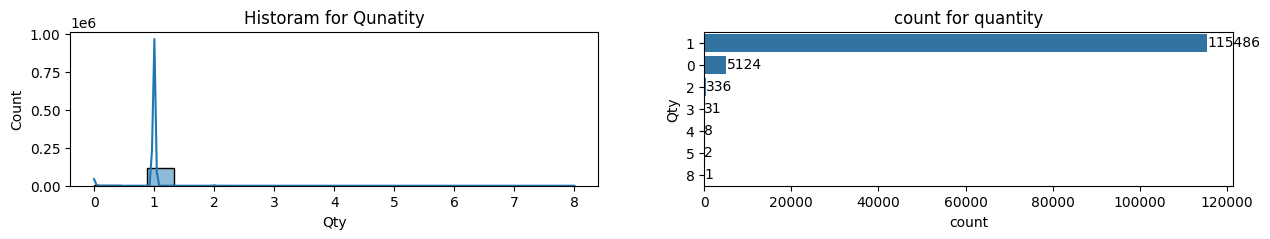

In [307]:
f, ax = plt.subplots(1,2, figsize=(15,2))
sns.histplot(df1['Qty'], kde=True, ax = ax[0])
ax[0].set_title(f'Historam for Qunatity')

bars = sns.countplot(y="Qty", data=df1, order=df1["Qty"].value_counts().index, ax = ax[1])
for bar in bars.containers:
    bars.bar_label(bar)
ax[1].set_title("count for quantity")
plt.show()

1.10. Analysizing "ship-city" --> Analyzing the top 10 cities in terms of no of orders.

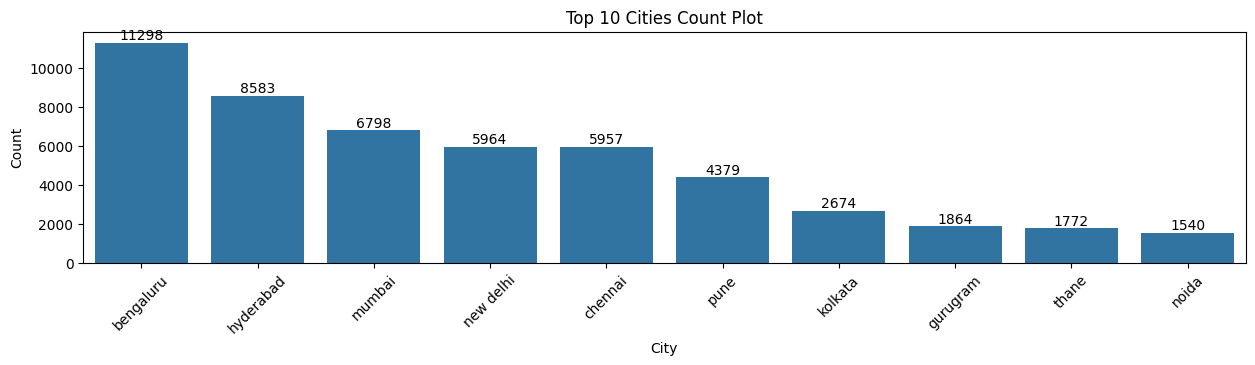

In [308]:
# top 10 cities based numner of orders, not on sum of amount
top10_cities = df1['ship-city'].value_counts().head(10)

plt.figure(figsize=(15, 3))
bars = sns.barplot(x=top10_cities.index, y=top10_cities.values)
for container in bars.containers:
    bars.bar_label(container)
plt.title('Top 10 Cities Count Plot')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Insights:

1. Most of the orders are placed from these metro-polition cities of India.

2. Nearly 90% of the total orders are placed from bengaluru, hyderabad, mumbai, new delhi & chennai.

1.11. Analysing the ship-state --> Top 10 states from which most are orders are placed.

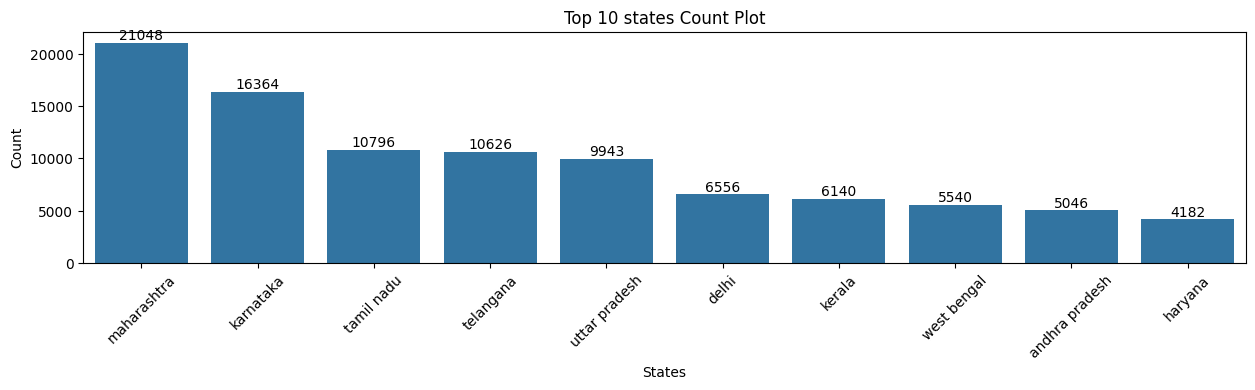

In [309]:
top10_states = df1['ship-state'].value_counts().head(10)

plt.figure(figsize=(15, 3))
bars = sns.barplot(x=top10_states.index, y=top10_states.values)
for container in bars.containers:
    bars.bar_label(container)
plt.title('Top 10 states Count Plot')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [310]:
df1.columns

Index(['Date', 'Year', 'Month', 'Status', 'Fulfilment', 'ship-service-level',
       'Category', 'Size', 'Courier Status', 'Qty', 'Amount', 'ship-city',
       'ship-state', 'ship-country', 'B2B'],
      dtype='object')

### 2. Key Objectives

2.1. Sales Overview: Understand the overall sales performance, trends, and paƩerns over time.

In [311]:
print("Total amount from sales in a calender of 2022: ", df1[df1.Year == 2022]['Amount'].sum())
print("Mean amount spent on each order: ", df1[df1.Year == 2022]['Amount'].mean())

Total amount from sales in a calender of 2022:  78478115.39
Mean amount spent on each order:  648.6437943432406


Text(0.5, 1.0, 'Distribution of quantity ordered per transaction with time')

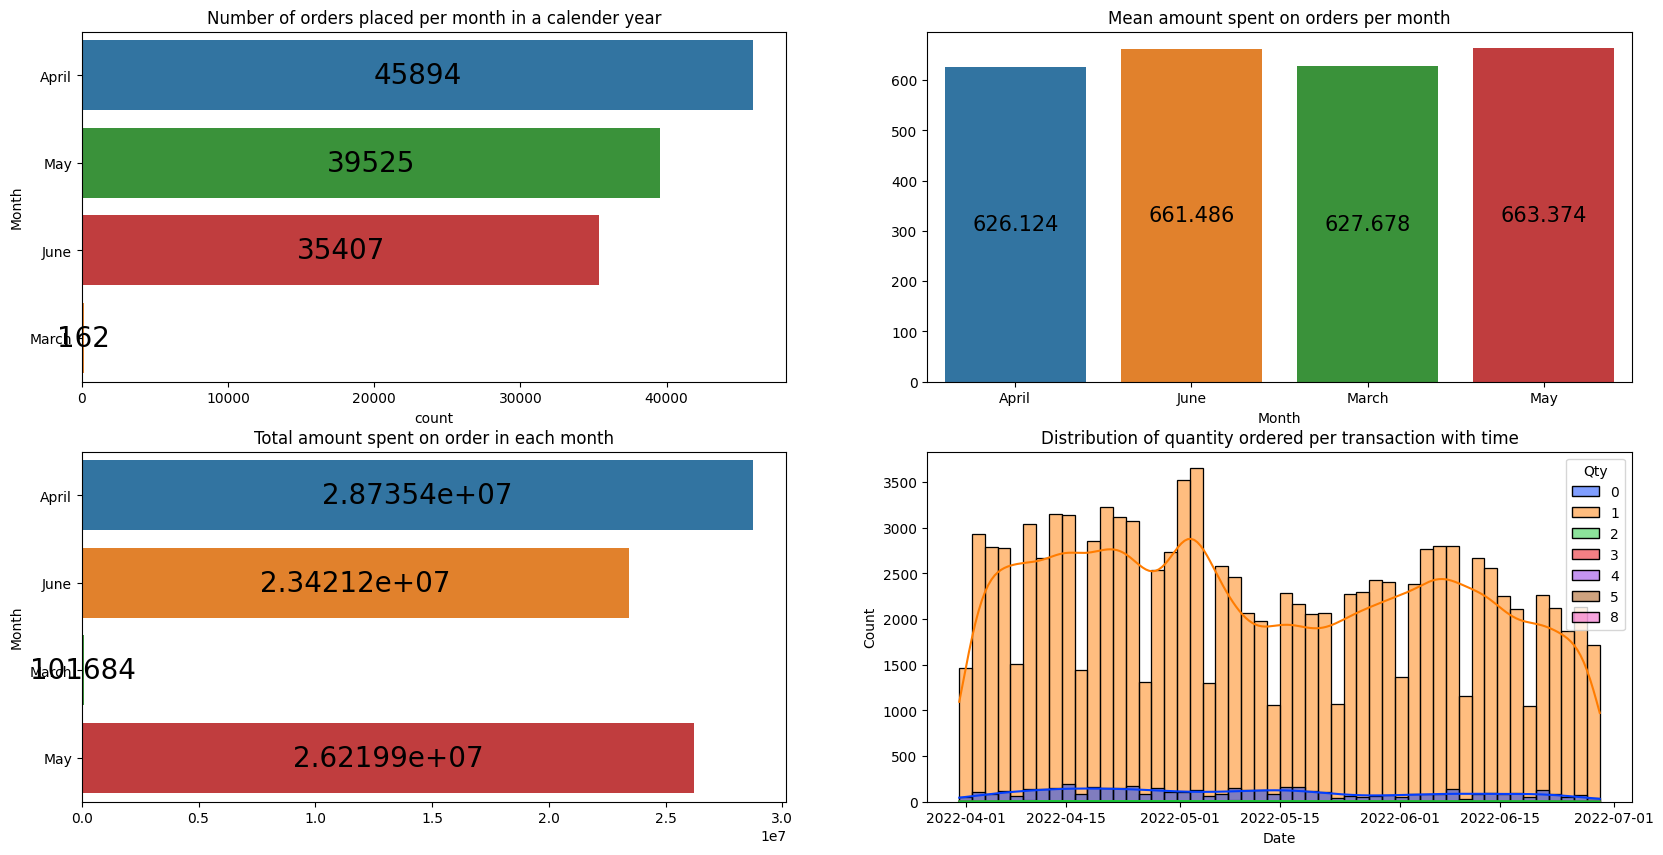

In [312]:
# Sales performance over time --> number of orders placed in each month.
f, ax = plt.subplots(2,2, figsize=(20,10))
# Adjust the horizontal and vertical space
f.subplots_adjust(hspace=0.2, wspace=0.2)  
sns.countplot(data=df1, y=df1['Month'], order=df1['Month'].value_counts().index, hue=df1['Month'], ax=ax[0, 0])
for container in ax[0, 0].containers:
    ax[0, 0].bar_label(container, color='black', size=20, label_type='center')
ax[0, 0].set_title("Number of orders placed per month in a calender year")
    
grouped = df1.groupby('Month')
sns.barplot(x=grouped['Amount'].mean().index, y=grouped['Amount'].mean().values, ax=ax[0, 1], hue=grouped['Amount'].mean().index)
for container in ax[0, 1].containers: 
    ax[0, 1].bar_label(container, color='black', size=15, label_type='center')
ax[0,1].set_title("Mean amount spent on orders per month")

sns.barplot(x=grouped['Amount'].sum().values, y=grouped['Amount'].sum().index, hue=grouped['Amount'].sum().index, ax=ax[1,0])
for container in ax[1,0].containers:  
    ax[1,0].bar_label(container, color='black', size=20, label_type='center')
ax[1,0].set_title("Total amount spent on order in each month")

sns.histplot(data=df1,x='Date',kde=True,hue='Qty', palette='bright', ax=ax[1,1])
ax[1,1].set_title("Distribution of quantity ordered per transaction with time")

Insights based on "Sales overview over time:

1. The month "April" has highest number of orders placed in the given calender year 2002.
2. Average amount spent on orders per transaction in every month are nearly same, as per analysis the month "May" holds highest average.
3. "April" hold the highest total (revenue) generated through sales compared to other months.
4. As per the data, customers mostly perferred to order single item (in qunatity).

#### 2.1. Product Analysis: Analyze the distribution of product categories, sizes, and quantities sold to identify popular
products. 

Distribution of categories, total orders placed from each category
Category
t-shirt     46969
shirt       46628
blazzer     14693
trousers    10149
perfume      1091
wallet        881
socks         419
shoes         155
watch           3
Name: count, dtype: int64
Distribution of items with respect to size, total orders placed from each size in entire sales
Size
m       20942
l       20452
xl      19391
xxl     16764
s       15624
3xl     13869
xs      10179
free     2130
6xl       705
5xl       526
4xl       406
Name: count, dtype: int64


Text(0.5, 1.0, 'Sales distribution on different sizes')

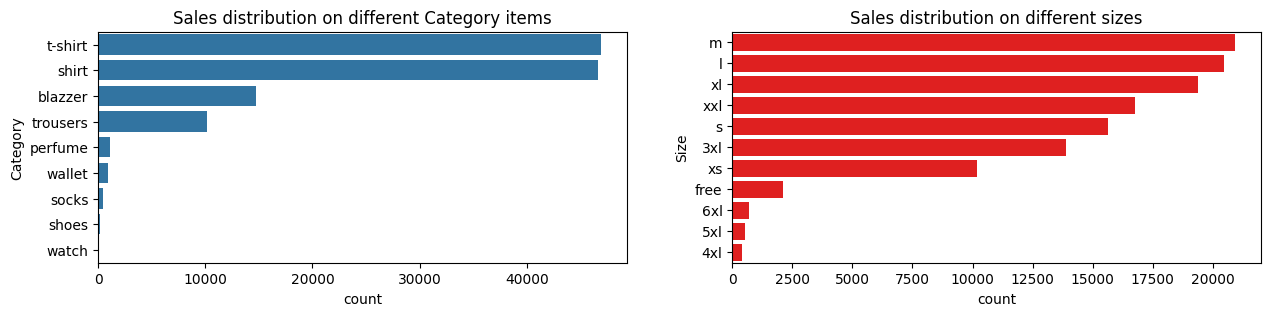

In [313]:
# Distribution of categories, total orders placed from each categor
print("Distribution of categories, total orders placed from each category")
print(df1['Category'].value_counts())

# Distribution of items with respect to size, total orders placed from each size in entire sales
print("Distribution of items with respect to size, total orders placed from each size in entire sales")
print(df1["Size"].value_counts())

f, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.countplot(data=df1, y="Category", order=df1['Category'].value_counts().index, ax=ax[0])
# for container in ax[0].containers:
#     ax[0].bar_label(container)
    
sns.countplot(data=df1, y="Size", order=df1["Size"].value_counts().index, ax=ax[1], color="r")
# for container in ax[1].containers:
#     ax[1].bar_label(container)
    
ax[0].set_title("Sales distribution on different Category items")
ax[1].set_title("Sales distribution on different sizes")

Insights:

1. T-shirts and shirts have major sales amoung other categories.

C:\Users\phani\AppData\Local\Temp\ipykernel_1772\4138510743.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_grouped_category, x='Amount', y='Category', ax=ax[0,0], palette='mako')
C:\Users\phani\AppData\Local\Temp\ipykernel_1772\4138510743.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_grouped_size, x='Amount', y='Size', ax=ax[0,1], palette='coolwarm')


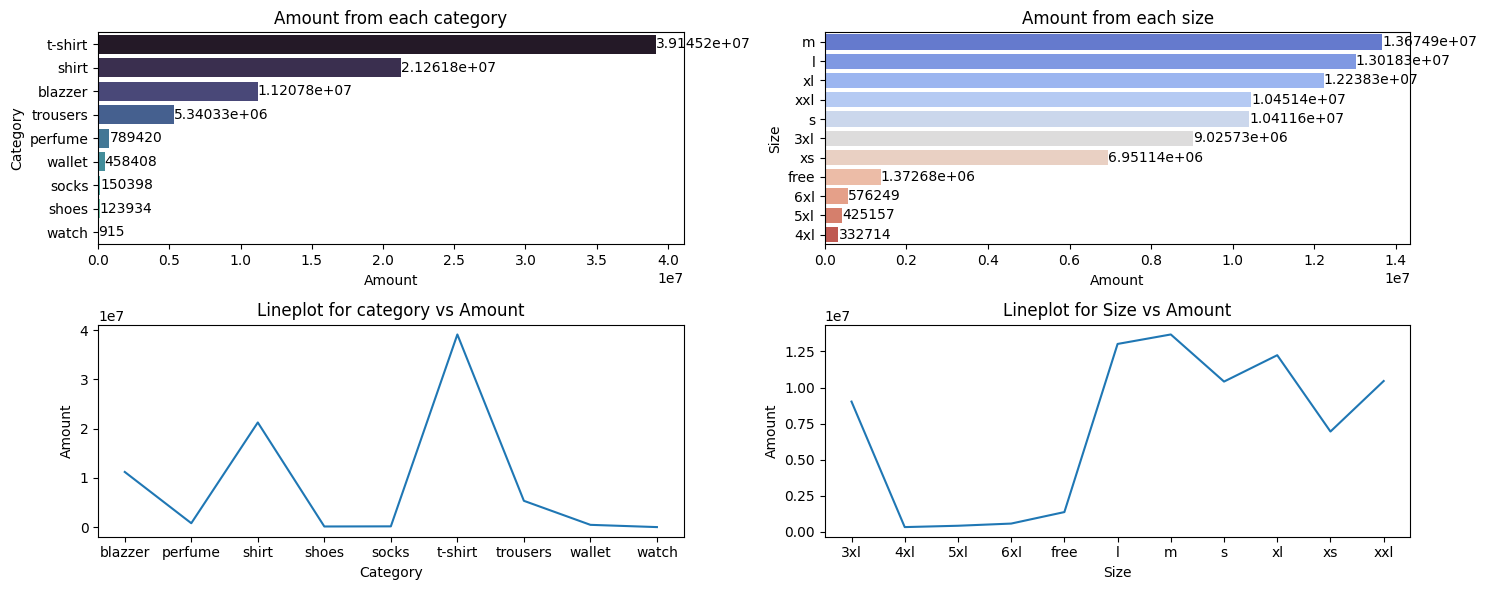

In [314]:
# Total amount ,i.e, revenue generated by amozon through sales from each category 

grouped_category = df1.groupby('Category')
# print(grouped_category['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False))
sorted_grouped_category = grouped_category['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Amount generated by amazon through sales from different sizes of goods.

grouped_size = df1.groupby('Size')
# print(grouped_size.Amount.sum().reset_index().sort_values(by='Amount', ascending=False))
sorted_grouped_size = grouped_size.Amount.sum().reset_index().sort_values(by='Amount', ascending=False)

f, ax = plt.subplots(2,2, figsize=(15,6))
sns.barplot(data=sorted_grouped_category, x='Amount', y='Category', ax=ax[0,0], palette='mako')
for container in ax[0,0].containers:
    ax[0,0].bar_label(container, label_type='edge')
ax[0,0].set_title("Amount from each category")
    
sns.barplot(data=sorted_grouped_size, x='Amount', y='Size', ax=ax[0,1], palette='coolwarm')
for container in ax[0,1].containers:
    ax[0,1].bar_label(container, label_type='edge')
ax[0,1].set_title("Amount from each size")
    

sns.lineplot(data=grouped_category['Amount'].sum().reset_index(), x='Category', y='Amount', ax=ax[1,0])
ax[1,0].set_title('Lineplot for category vs Amount')

sns.lineplot(data=grouped_size['Amount'].sum().reset_index(), x='Size', y='Amount', ax=ax[1,1])
ax[1,1].set_title('Lineplot for Size vs Amount')

plt.tight_layout()
plt.show()

Insight:

1. Amoung all category of goods, "t-shirt" sales are high in both cost and number.
2. Amoung all different sizes, "m & l" sizes sales are high.
3. popular goods from above categories are t-shirts, and the very next are shirts.

C:\Users\phani\AppData\Local\Temp\ipykernel_1772\3512983308.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_mean, x='Amount', y='Category', ax=ax[0,0], palette='mako')
C:\Users\phani\AppData\Local\Temp\ipykernel_1772\3512983308.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_mean, x='Amount', y='Size', ax=ax[0,1], palette='coolwarm')


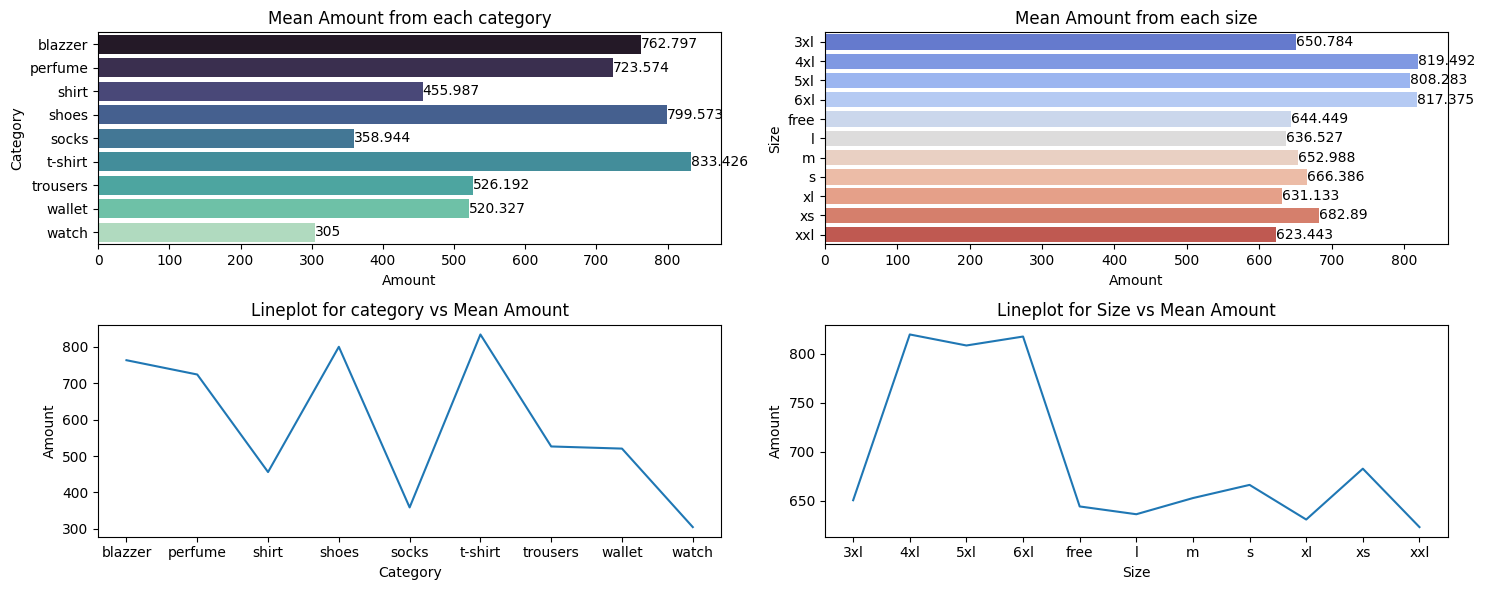

In [315]:
# Mean amount spent by customer on each category
category_mean = grouped_category['Amount'].mean().reset_index()

# Mean amount spent by customers on different sizes of the goods.
size_mean = grouped_size.Amount.mean().reset_index()

f, ax = plt.subplots(2,2, figsize=(15,6))
sns.barplot(data=category_mean, x='Amount', y='Category', ax=ax[0,0], palette='mako')
for container in ax[0,0].containers:
    ax[0,0].bar_label(container, label_type='edge')
ax[0,0].set_title("Mean Amount from each category")
    
sns.barplot(data=size_mean, x='Amount', y='Size', ax=ax[0,1], palette='coolwarm')
for container in ax[0,1].containers:
    ax[0,1].bar_label(container, label_type='edge')
ax[0,1].set_title("Mean Amount from each size")
    

sns.lineplot(data=grouped_category['Amount'].mean().reset_index(), x='Category', y='Amount', ax=ax[1,0])
ax[1,0].set_title('Lineplot for category vs Mean Amount')

sns.lineplot(data=grouped_size['Amount'].mean().reset_index(), x='Size', y='Amount', ax=ax[1,1])
ax[1,1].set_title('Lineplot for Size vs Mean Amount')

plt.tight_layout()
plt.show()

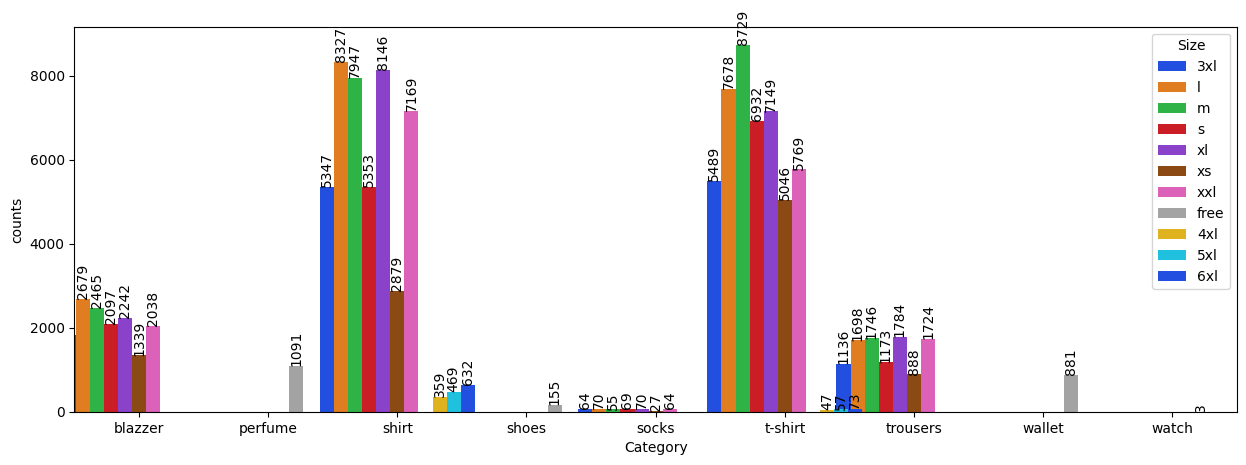

In [316]:
# Group by 'Category' and get the size distribution
categories_size = df1.groupby(['Category', 'Size']).size().reset_index(name='counts')
# print(categories_size)
# Plotting
plt.figure(figsize=(15,5))
bars = sns.barplot(x='Category', y='counts', hue='Size', data=categories_size, palette='bright', width=1.2)
for bar in bars.containers:
    bars.bar_label(bar,size=10 ,rotation=90)

#### 2.3. Fulfillment Analysis: Investigate the fulfillment methods used and their effectiveness in delivering orders

In [317]:
df1['Courier Status'].value_counts()

Courier Status
shipped       109315
unshipped       6549
on the way      5124
Name: count, dtype: int64

In [318]:
df1.Fulfilment.value_counts()

Fulfilment
amazon      83524
merchant    37464
Name: count, dtype: int64

Fulfilment
amazon      83524
merchant    37464
Name: count, dtype: int64


Text(0.5, 1.0, 'Amount vs Fulfilment methods')

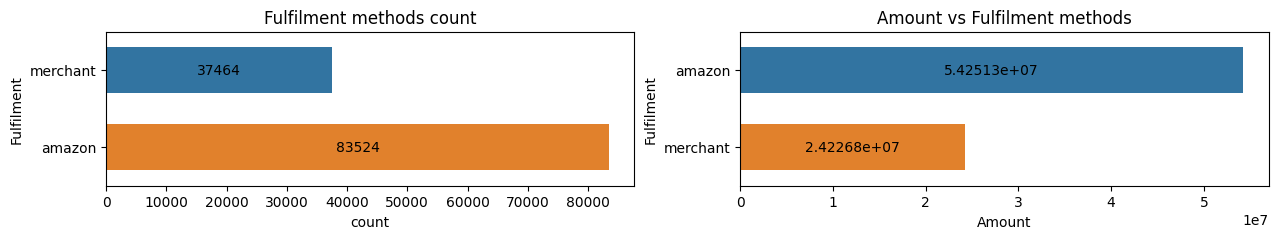

In [319]:
# Fullfillment methods choosen by sellerto fullfill the customers orders. Also number of orders placed in the respective method.
print(df1['Fulfilment'].value_counts())
f, ax = plt.subplots(1,2, figsize=(15,2))
sns.countplot(data=df1, y='Fulfilment', hue='Fulfilment', ax=ax[0], width=0.6)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='center')
ax[0].set_title("Fulfilment methods count")

sns.barplot(data=df1.groupby('Fulfilment')['Amount'].sum().reset_index(), x='Amount', y='Fulfilment', ax=ax[1], hue='Fulfilment', width=0.6)
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Amount vs Fulfilment methods')

Insights:

1. Most of the stock is handled by amazon which is about 70%. Amazon itself handles storage, packing, delivery.
2. Rest of the sales are handled by third party merchants.

Text(0, 0.5, 'Fulfilment methods')

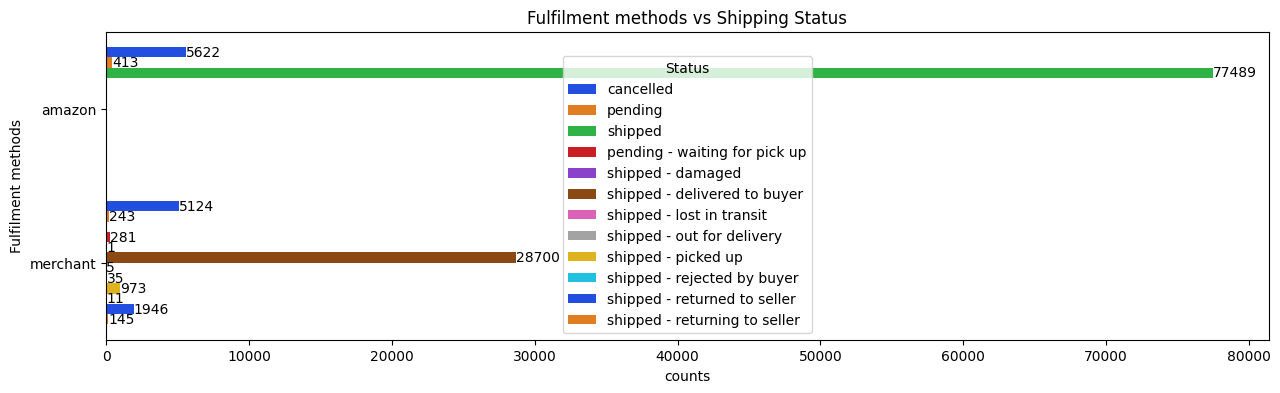

In [320]:
# Fulfillment Method vs. Shippping Status: To investigate the effectiveness of different fulfillment methods.
grouped_fulfilment = df1.groupby(['Fulfilment','Status']).size().reset_index(name='counts')
plt.figure(figsize=(15,4))
ax = sns.barplot(data=grouped_fulfilment, y='Fulfilment', x='counts', hue='Status', palette='bright')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Fulfilment methods vs Shipping Status')
plt.ylabel('Fulfilment methods')


Insights:

1. Amazon fulfilment is handling better in terms of shipping the orders and delivering.

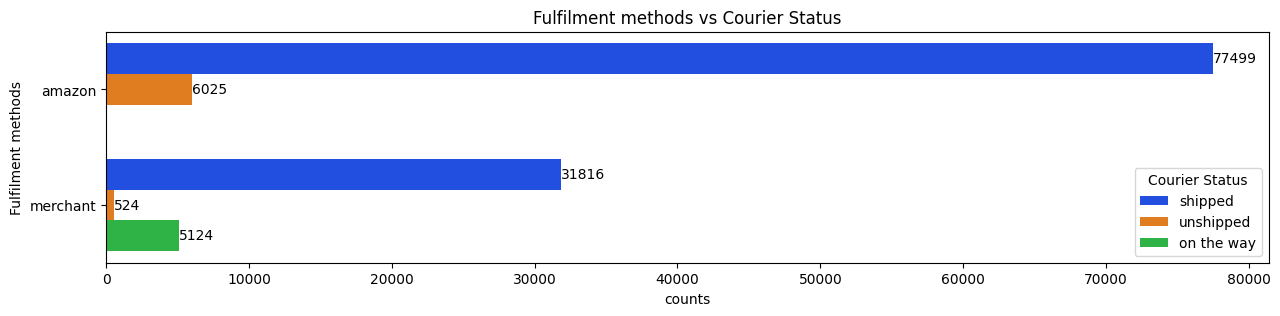

In [321]:
# Fulfillment Method vs. Courier status: To analyze how orders are delivered based on the fulfillment method.
plt.figure(figsize=(15,3))
grouped_fulfilment1 = df1.groupby(['Fulfilment','Courier Status']).size().reset_index(name='counts')
ax = sns.barplot(data=grouped_fulfilment1, y='Fulfilment', x='counts', hue='Courier Status', palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Fulfilment methods vs Courier Status')
plt.ylabel('Fulfilment methods')
plt.show()


Insights:

1. Amazon shipping status is high, and more orders are delivered by amazon fulfilment methods only.

#### 2.4. Customer Segmentation: Segment customers based on their buying behaviour, location, and other relevant
factors.

In [322]:
df1.head()

,Date,Year,Month,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-country,B2B
0,2022-04-30,2022,April,cancelled,merchant,standard,t-shirt,s,on the way,0,647.62,mumbai,maharashtra,in,False
1,2022-04-30,2022,April,shipped - delivered to buyer,merchant,standard,shirt,3xl,shipped,1,406.00,bengaluru,karnataka,in,False
2,2022-04-30,2022,April,shipped,amazon,expedited,shirt,xl,shipped,1,329.00,navi mumbai,maharashtra,in,True
3,2022-04-30,2022,April,cancelled,merchant,standard,blazzer,l,on the way,0,753.33,puducherry,puducherry,in,False
4,2022-04-30,2022,April,shipped,amazon,expedited,trousers,3xl,shipped,1,574.00,chennai,tamil nadu,in,False


ship-service-level
expedited    82609
standard     38379
Name: count, dtype: int64


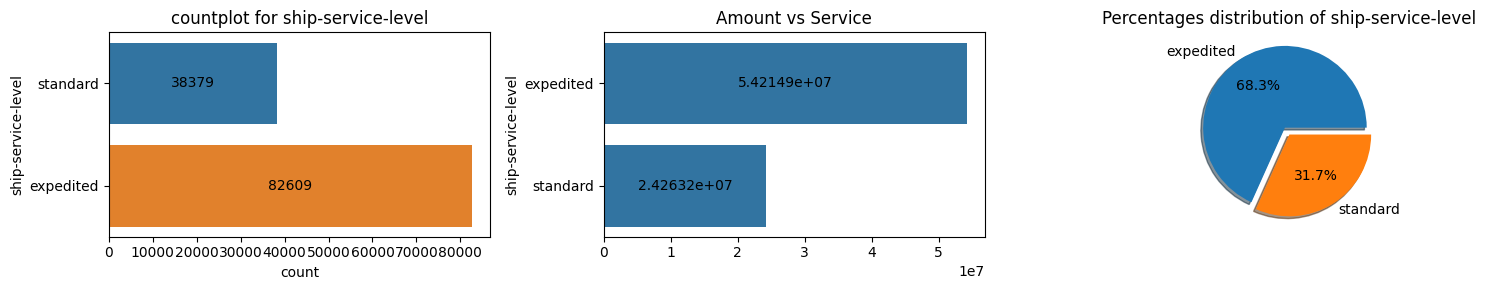

In [329]:
# Customer segmentation based on "Ship-service-level"
print(df1['ship-service-level'].value_counts())

f, ax = plt.subplots(1,3, figsize=(15,3))
sns.countplot(data=df1, y='ship-service-level', hue='ship-service-level', ax=ax[0])
for container in ax[0].containers: 
    ax[0].bar_label(container, label_type='center')
ax[0].set_title('countplot for ship-service-level')

plt.pie(x=df1['ship-service-level'].value_counts(), labels=df1['ship-service-level'].value_counts().index, autopct='%1.1f%%', explode=[0.1,0], shadow=True)
ax[2].set_title('Percentages distribution of ship-service-level')

sns.barplot(x=df1.groupby('ship-service-level')['Amount'].sum().values, y=df1.groupby('ship-service-level')['Amount'].sum().index, ax=ax[1])
for container in ax[1].containers:  
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Amount vs Service')
plt.tight_layout()
plt.show()


Insights:

1. A significant majority (68%) of customers prefer expedited shipping over standard shipping. This suggests that customers value faster delivery times.

<Axes: xlabel='Amount', ylabel='Count'>

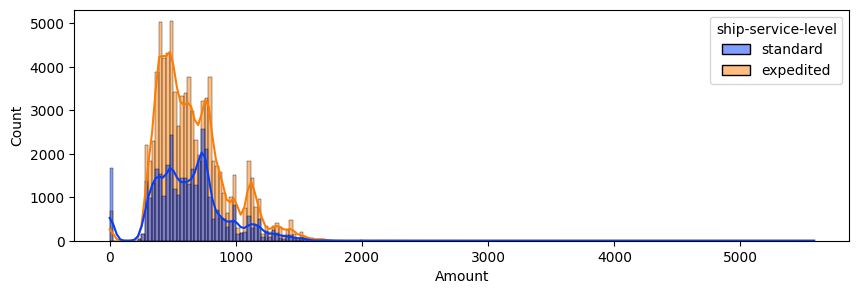

In [341]:
plt.figure(figsize=(10,3))
sns.histplot(data=df1, x='Amount', bins=200,kde=True, hue='ship-service-level', palette='bright')

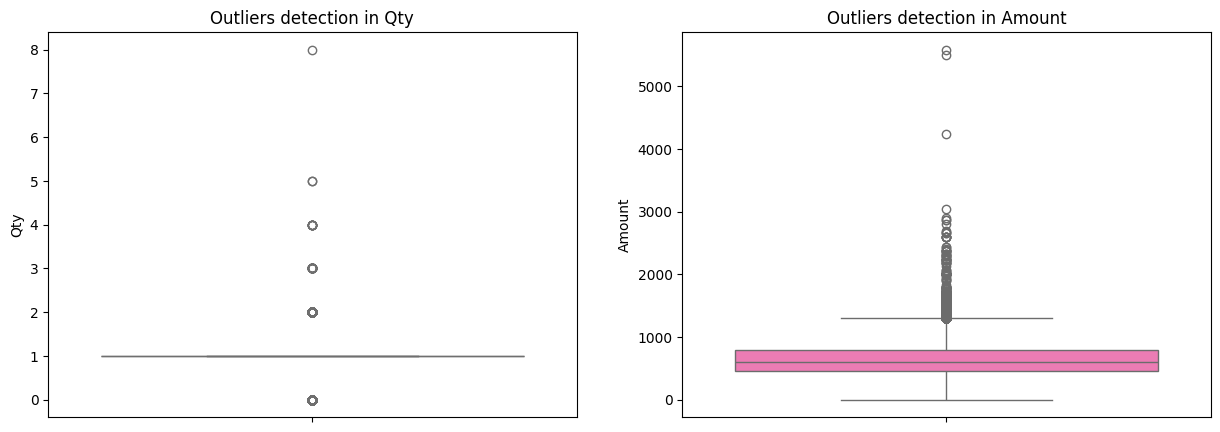

In [368]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.boxplot(df1['Qty'],color='skyblue')
plt.title('Outliers detection in Qty')
plt.subplot(122)
sns.boxplot(df['Amount'],color='hotpink')
plt.title('Outliers detection in Amount')
plt.show()

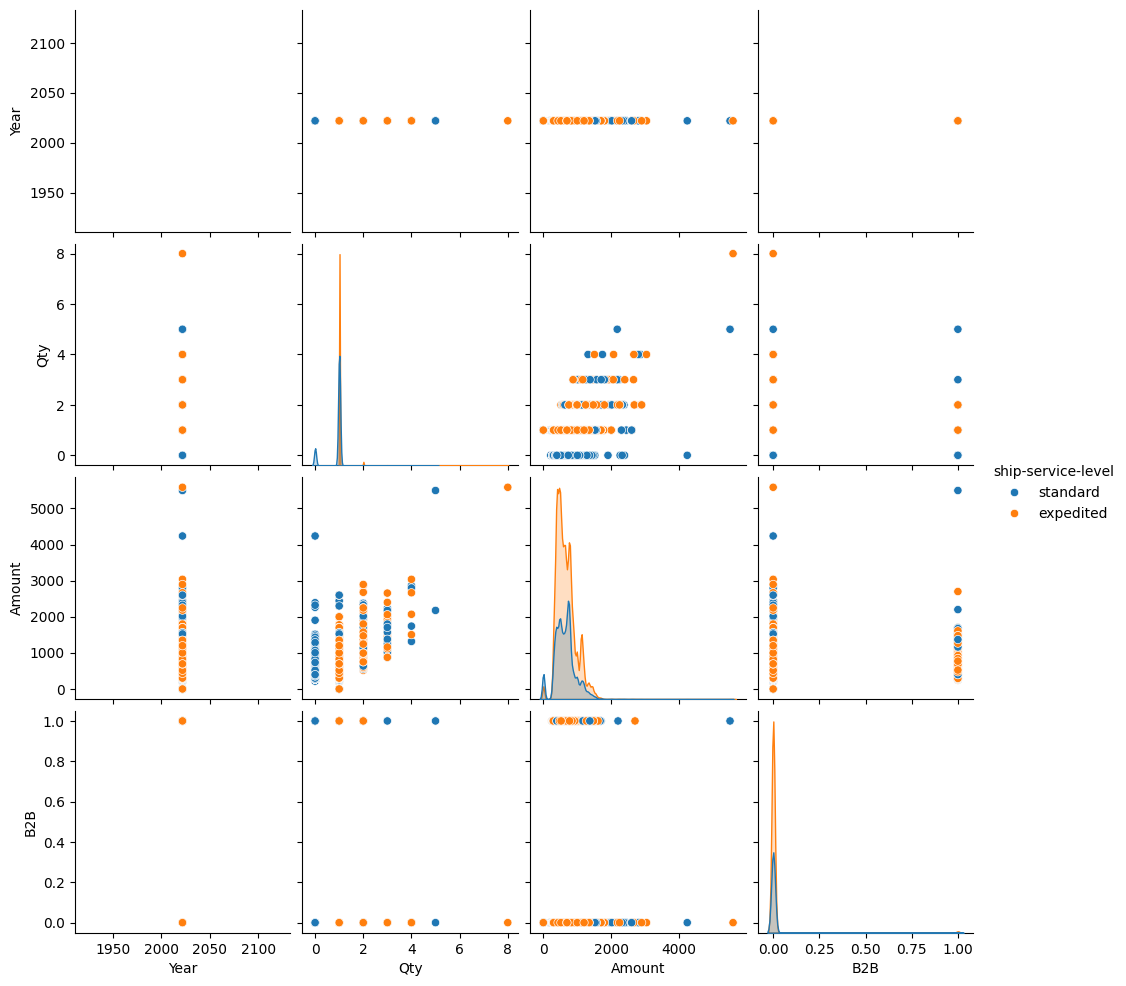

In [369]:
# Multivariate analysis on 'ship-service-level'
sns.pairplot(df1,hue = 'ship-service-level')
plt.show()

<Axes: xlabel='Qty', ylabel='Amount'>

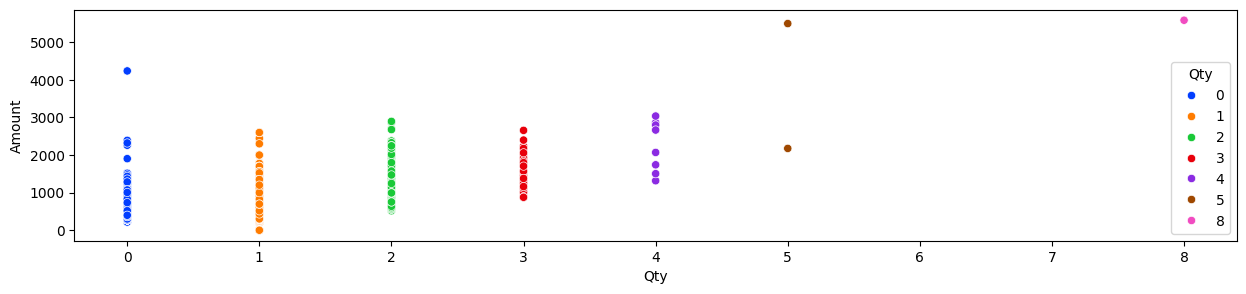

In [371]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='Qty', y='Amount', data=df1, hue='Qty', palette='bright')

B2B
False    120145
True        843
Name: count, dtype: int64


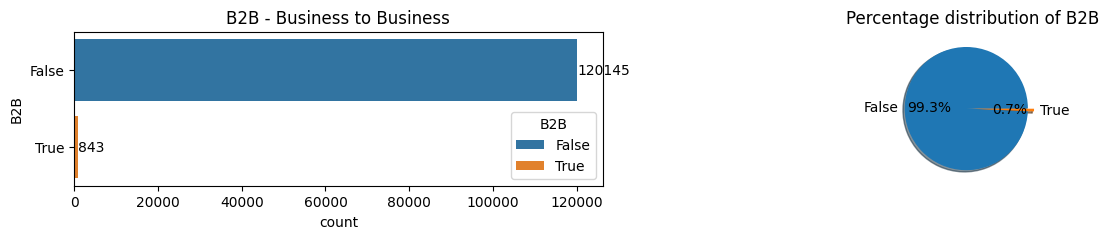

In [335]:
# B2B analysis
print(df1['B2B'].value_counts())

f, ax = plt.subplots(1,2, figsize=(15,2))
sns.countplot(data=df1, y='B2B', ax=ax[0], hue='B2B')
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('B2B - Business to Business')

plt.pie(x=df1['B2B'].value_counts().values, labels=df1['B2B'].value_counts().index, autopct='%1.1f%%', explode=[0.1,0], shadow=True)
ax[1].set_title('Percentage distribution of B2B')
plt.show()

Insights: 

1. B2B (Business-to-Business) refers to transactions or business conducted between two businesses, such as a manufacturer and a wholesaler, or a wholesaler and a retailer.
2. Most of the orders, about 99% of the orders are placed by customers, only 1% sales by other business manufactures.


#### 2.5. Geographical Analysis: Explore the geographical distribution of sales, focusing on states and cities

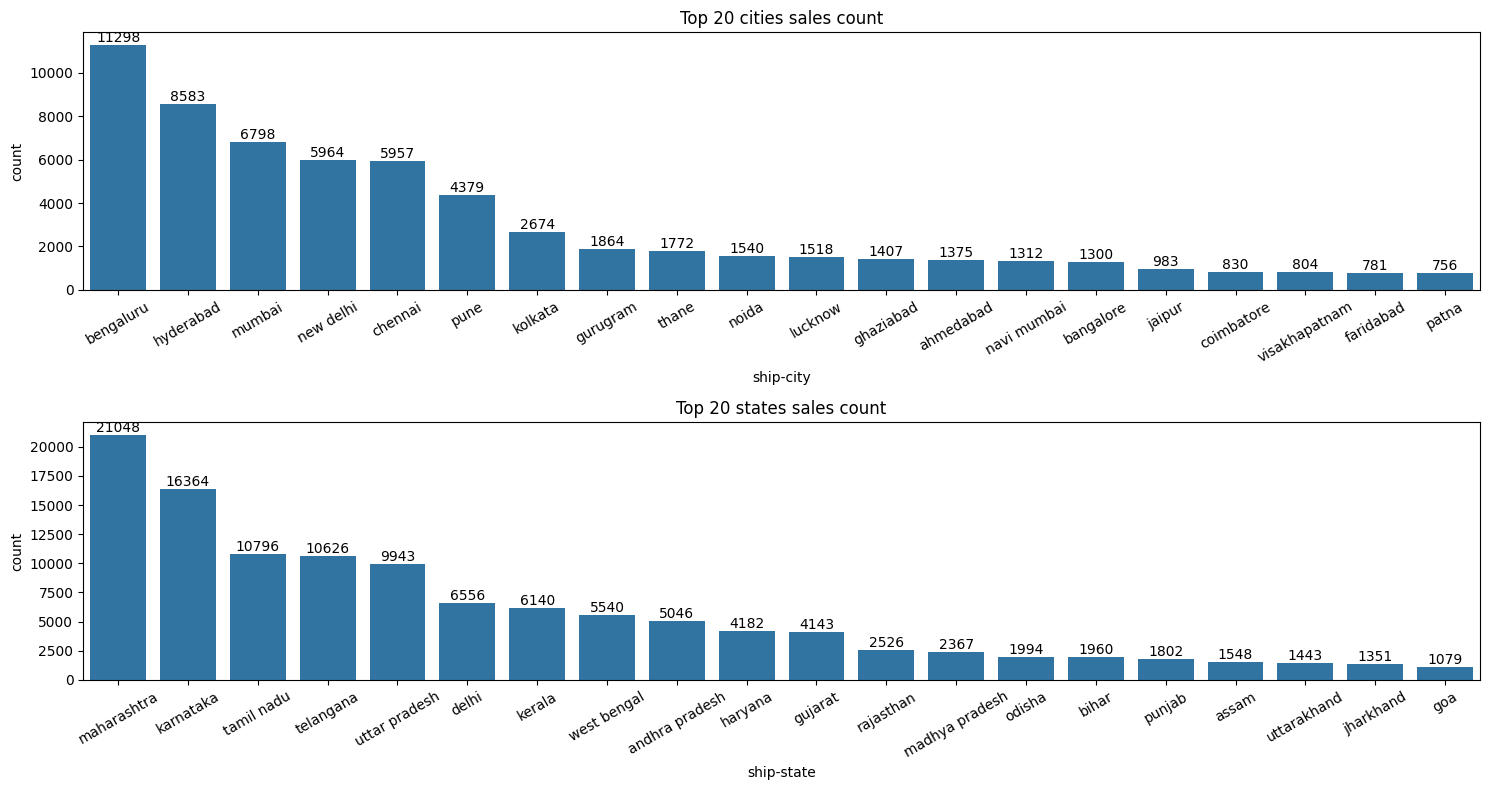

In [359]:
# Explore top 20 cities & states from which maximum sales distribution.
cities_count20 = df1['ship-city'].value_counts().reset_index().head(20)
state_count20 = df1['ship-state'].value_counts().reset_index().head(20)

f, ax = plt.subplots(2,1,figsize=(15,8))
sns.barplot(x=cities_count20['ship-city'], y=cities_count20['count'], ax=ax[0])
for container in ax[0].containers:   
    ax[0].bar_label(container)
ax[0].tick_params(axis='x', rotation=30)

sns.barplot(x=state_count20['ship-state'], y=state_count20['count'], ax=ax[1])
for container in ax[1].containers:   
    ax[1].bar_label(container)
ax[1].tick_params(axis='x', rotation=30)

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5)
ax[0].set_title('Top 20 cities sales count')
ax[1].set_title('Top 20 states sales count')

plt.tight_layout()
plt.show()

Insight:

1. About 90% of the customers are from the metro-politian cities of India.
2. From cities, Banglore holds maximum orders from customers
3. From states, Maharashtra holds maximum orders from customers.

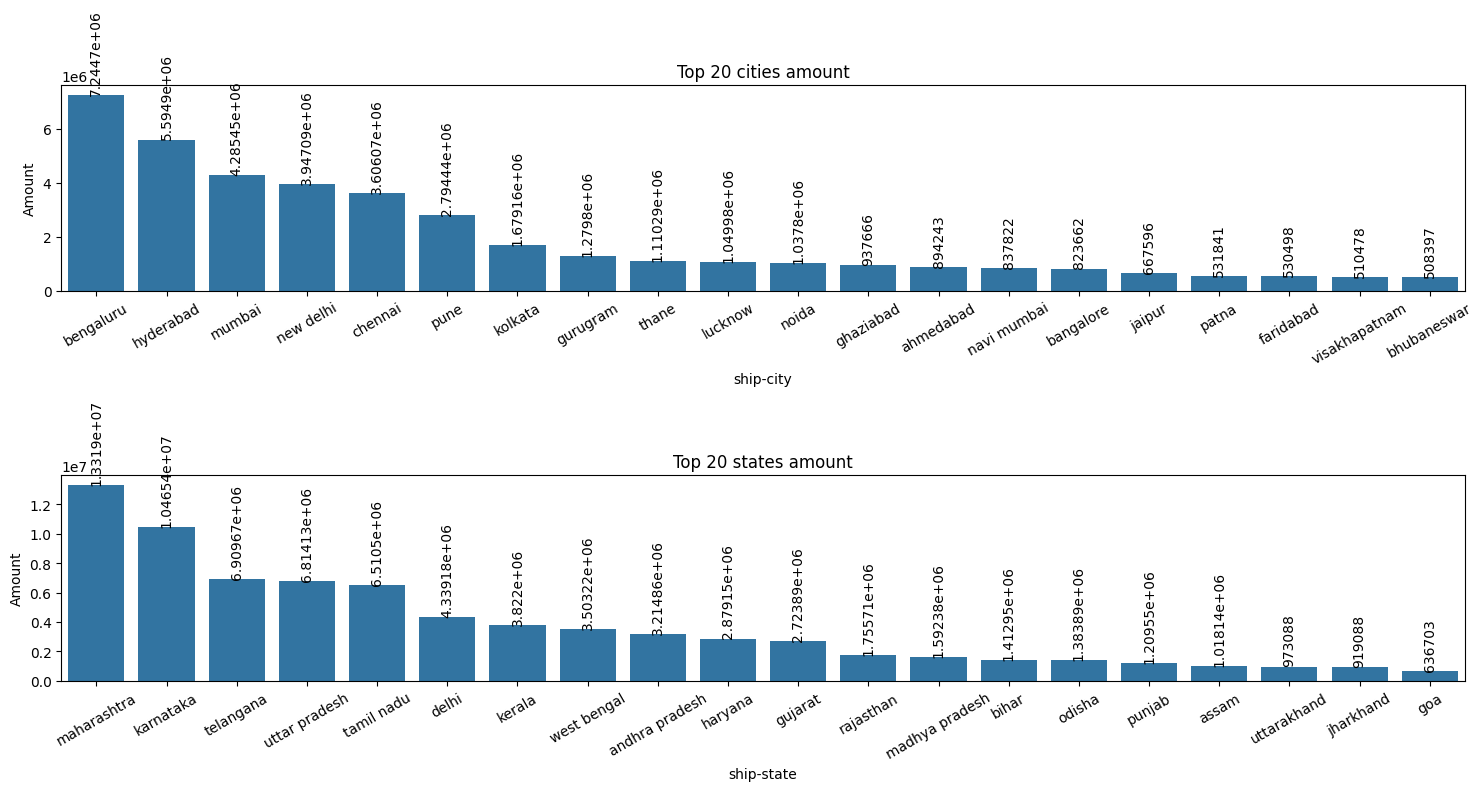

In [364]:
# Explore top 20 cities & states from which maximum expenditure is spent on orders distribution.
cities_amount20 = df1.groupby('ship-city')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(20)
state_amount20 = df1.groupby('ship-state')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(20)

f, ax = plt.subplots(2,1,figsize=(15,8))
sns.barplot(x=cities_amount20['ship-city'], y=cities_amount20['Amount'], ax=ax[0])
for container in ax[0].containers:   
    ax[0].bar_label(container, rotation=90)
ax[0].tick_params(axis='x', rotation=30)

sns.barplot(x=state_amount20['ship-state'], y=state_amount20['Amount'], ax=ax[1])
for container in ax[1].containers:   
    ax[1].bar_label(container, rotation=90)
ax[1].tick_params(axis='x', rotation=30)

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5)
ax[0].set_title('Top 20 cities amount')
ax[1].set_title('Top 20 states amount')

plt.tight_layout()
plt.show()

Insights:

1. Bengaluru city customers spending more expenditure compared to other geographic cities.
2. Maharashra state hold the first place in revenue from customer orders.

#### 2.6. Business Insights:

1. In an acedamic year, in the month of "April" has highest sales.
2. 70% of the stock is handled by amazon. Amazon handles the storage, packing, shipping, customer service, and returns.
3. 30% of the stock is handled by the merchant (who is some third party logistic provider)
4. A significant majority (68%) of customers prefer expedited shipping over standard shipping. This suggests that customers value faster delivery times.
5. "T-shirt & shirt" are more ordered stocks from the category.
6. Service Demand: The high demand for expedited shipping indicates that Amazon's logistics and supply chain need to be optimized to handle a larger volume of expedited orders efficiently.
7. Potential Revenue Impact: Expedited shipping often comes with higher shipping fees, which could positively impact Amazon's revenue from shipping services.
8. Inventory Management: To meet the demand for expedited shipping, Amazon may need to ensure that popular items are stocked in multiple warehouses closer to customers to facilitate quicker delivery.
9. Metro-politan cities have major sales of Amazon.
10. Maharastra & Benguluru have major orders placed.